CSL2050: PRML

**MAJOR PROJECT**


**Toxic Comment Classification Using Machine Learning**


by


**Narkhede Kartik Sanjay (B21EE041)**


**Raunak Garg (B21EE056)**


**Samarth Sudhirkumar Bhalerao (B21EE060)**

#Importing libraries

In [ ]:
#import required packages
#basics
import pandas as pd
import numpy as np

#misc
import gc
import time
import warnings

#stats
#from scipy.misc import imread
from scipy import sparse
import scipy.stats as ss

#viz
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
import matplotlib_venn as venn

#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords
import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer


#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter('ignore', category=DeprecationWarning)



from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
import pickle
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight


!pip install emoji
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Importing datasets

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/major_project/train.csv',header=None)
df.columns=["id","comment_text" , "toxic" , "severe_toxic" ,"obscene","threat","insult","identity_hate"]
df.drop(['id'], axis = 1, inplace = True)
df

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0


#Undersampling method 1

In [ ]:
# import pandas as pd
# from sklearn.cluster import KMeans

# # read in your original dataframe
# #df = pd.read_csv('your_data.csv')

# # specify the number of clusters
# num_clusters = 10

# # define the column names to exclude from the clustering process
# text_cols = ['comment_text', 'tokens','stop_removed','final_string'] # replace with the names of your text columns

# # create a subset of the dataframe with the text columns excluded
# df_numeric = df.drop(columns=text_cols)

# # create a KMeans object with the specified number of clusters
# kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# # fit the KMeans model to the data
# kmeans.fit(df_numeric)

# # get the cluster labels for each row
# cluster_labels = kmeans.predict(df_numeric)

# # create an empty dataframe to store the undersampled data
# undersampled_df = pd.DataFrame()

# # for each cluster, select a representative subset of rows
# for i in range(num_clusters):
#     # get the indices of the rows belonging to the current cluster
#     indices = [j for j, label in enumerate(cluster_labels) if label == i]
#     # randomly select 10% of the rows from the current cluster
#     undersampled_indices = pd.Series(indices).sample(frac=0.1, random_state=42).tolist()
#     # add the selected rows to the undersampled dataframe
#     undersampled_df = pd.concat([undersampled_df, df.loc[undersampled_indices]])

# # reset the index of the undersampled dataframe
# undersampled_df_final = undersampled_df.reset_index(drop=True)
# undersampled_df_final

# # print the number of rows in the undersampled dataframe
# #print(f"Number of rows in undersampled dataframe: {undersampled_df.shape[0]}")


In [ ]:
# col_sum = undersampled_df_final.iloc[:,1:].sum()
# row_sum = undersampled_df_final.iloc[:,1:].sum(axis = 1)

# undersampled_df_final['non_toxic'] = (row_sum == 0)

# print("Total comments = ", len(undersampled_df_final))
# print("Total non_toxic comments = ", undersampled_df_final['non_toxic'].sum())
# print("Count of each type of comment:")
# print(col_sum)

# balanced_df.to_csv('balanced_data.csv', index=False)
# balanced_df

In [ ]:
# df = undersampled_df_final

This is basically giving us a smaller version of original dataset and thus we are discarding this smaller unbalanced data.

#Preprocessing and visualization

In [ ]:
na_val=df.isnull().sum()
print(na_val)

comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


In [ ]:
col_sum = df.iloc[:,1:].sum()
row_sum = df.iloc[:,1:].sum(axis = 1)

df['non_toxic'] = (row_sum == 0)

print("Total comments = ", len(df))
print("Total non_toxic comments = ", df['non_toxic'].sum())
print("Count of each type of comment:")
print(col_sum)

Total comments =  159571
Total non_toxic comments =  143346
Count of each type of comment:
toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64


In [ ]:
multi_val = row_sum.value_counts()

In [ ]:
multi_val.values

array([143346,   6360,   4209,   3480,   1760,    385,     31])

In [ ]:
def make_confusion_matrix(col1, col2):
    conf_mat = pd.crosstab(df[col1], df[col2])
    print("Confusion matrix:")
    print(conf_mat)

arr_col = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
for i in arr_col:
    for j in arr_col:
        if(i != j):
            make_confusion_matrix(i, j)

Confusion matrix:
severe_toxic       0     1
toxic                     
0             144277     0
1              13699  1595
Confusion matrix:
obscene       0     1
toxic                
0        143754   523
1          7368  7926
Confusion matrix:
threat       0    1
toxic              
0       144248   29
1        14845  449
Confusion matrix:
insult       0     1
toxic               
0       143744   533
1         7950  7344
Confusion matrix:
identity_hate       0     1
toxic                      
0              144174   103
1               13992  1302
Confusion matrix:
toxic              0      1
severe_toxic               
0             144277  13699
1                  0   1595
Confusion matrix:
obscene            0     1
severe_toxic              
0             151044  6932
1                 78  1517
Confusion matrix:
threat             0    1
severe_toxic             
0             157610  366
1               1483  112
Confusion matrix:
insult             0     1
severe_toxic   

In [ ]:
df_toxic = df[df['toxic']==1]
print("Toxic comment:")
print(df_toxic.iloc[2,0])

Toxic comment:
Bye! 

Don't look, come or think of comming back! Tosser.


In [ ]:
df_severe_toxic = df[df['severe_toxic']==1]
print("Severe toxic comment:")
print(df_severe_toxic.iloc[0,0])

Severe toxic comment:
COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK


In [ ]:
df_obscene = df[df['obscene']==1]
print("Obscene comment:")
print(df_obscene.iloc[3,0])

Obscene comment:
GET FUCKED UP. GET FUCKEEED UP.  GOT A DRINK THAT YOU CANT PUT DOWN???/ GET FUCK UP GET FUCKED UP.  I'M FUCKED UP RIGHT NOW!


In [ ]:
df_threat = df[df['threat']==1]
print("Threat comment:")
print(df_threat.iloc[2,0])

Threat comment:
I'm also a sock puppet of this account...SUPRISE!!
-sincerely,
            The man that will track you down from the Internet and kill you


In [ ]:
df_insult = df[df['insult']==1]
print("Insult comment:")
print(df_insult.iloc[6,0])

Insult comment:
Would you both shut up, you don't run wikipedia, especially a stupid kid.


In [ ]:
df_identity_hate = df[df['identity_hate']==1]
print("Identity Hate comment:")
print(df_identity_hate.iloc[10,0])

Identity Hate comment:
Fuck you faggot, I don't care if i get blocked, as long as everyone knows you are a dumb cunt.


In [ ]:
df

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,non_toxic
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,True
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,True
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,True
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,True
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,True
...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,True
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,True
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,True
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,True


In [ ]:
df_non_toxic = df[df['non_toxic']==1]

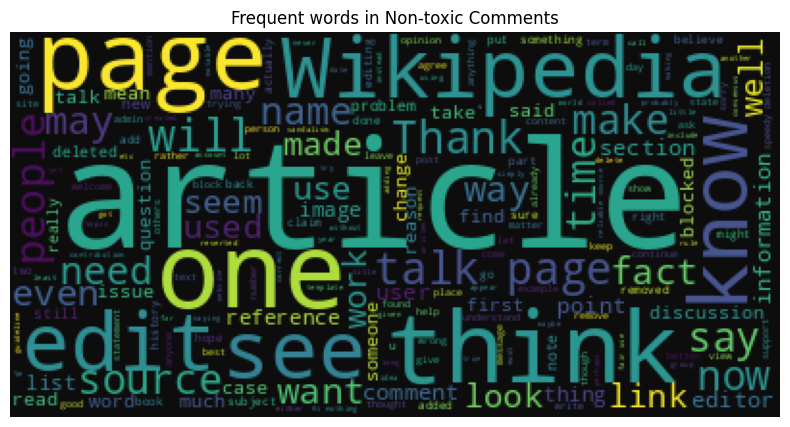

In [ ]:
stopword=set(STOPWORDS)
non_toxic_comments = df_non_toxic['comment_text'].values
wc= WordCloud(max_words=1000,stopwords=stopword)
wc.generate(" ".join(non_toxic_comments))
plt.figure(figsize=(10,5))
plt.axis("off")
plt.title("Frequent words in Non-toxic Comments")
plt.imshow(wc.recolor(), alpha=0.95)
plt.show()

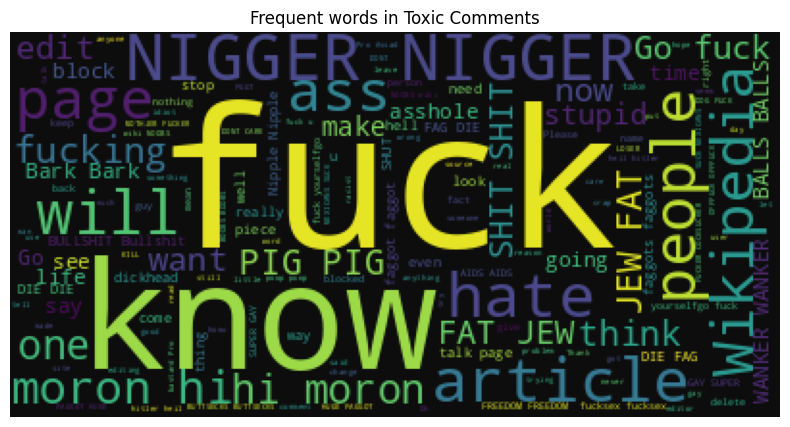

In [ ]:
toxic_comments = df_toxic['comment_text'].values
wc= WordCloud(max_words=1000,stopwords=stopword)
wc.generate(" ".join(toxic_comments))
plt.figure(figsize=(10,5))
plt.axis("off")
plt.title("Frequent words in Toxic Comments")
plt.imshow(wc.recolor(), alpha=0.95)
plt.show()

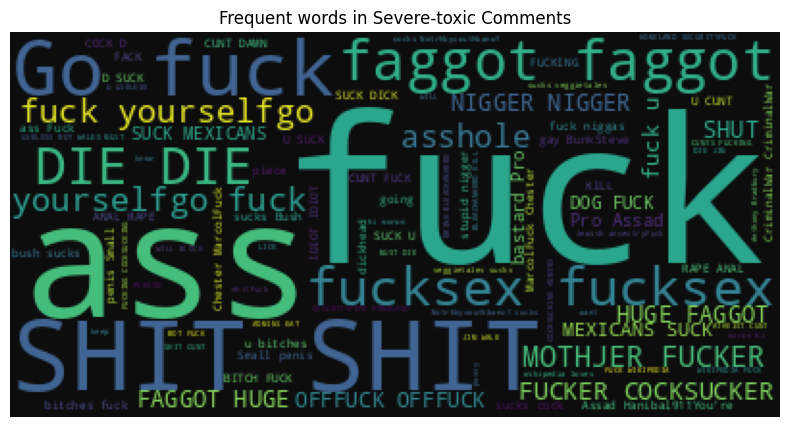

In [ ]:
severe_toxic_comments = df_severe_toxic['comment_text'].values
wc= WordCloud(max_words=1000,stopwords=stopword)
wc.generate(" ".join(severe_toxic_comments))
plt.figure(figsize=(10,5))
plt.axis("off")
plt.title("Frequent words in Severe-toxic Comments")
plt.imshow(wc.recolor(), alpha=0.95)
plt.show()

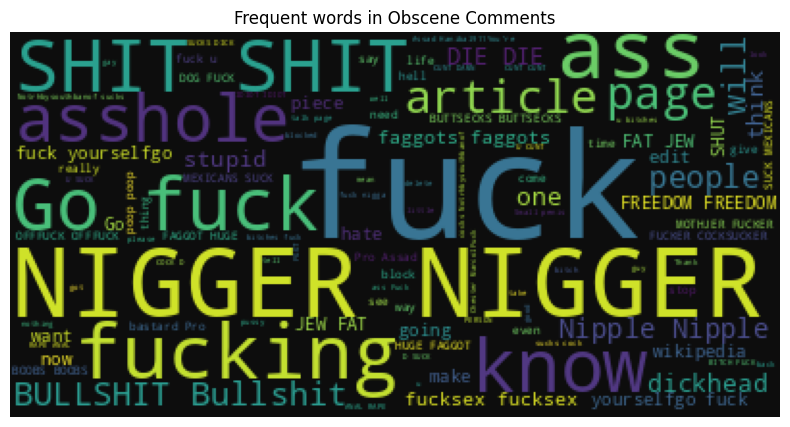

In [ ]:
obscene_comments = df_obscene['comment_text'].values
wc= WordCloud(max_words=1000,stopwords=stopword)
wc.generate(" ".join(obscene_comments))
plt.figure(figsize=(10,5))
plt.axis("off")
plt.title("Frequent words in Obscene Comments")
plt.imshow(wc.recolor(), alpha=0.95)
plt.show()

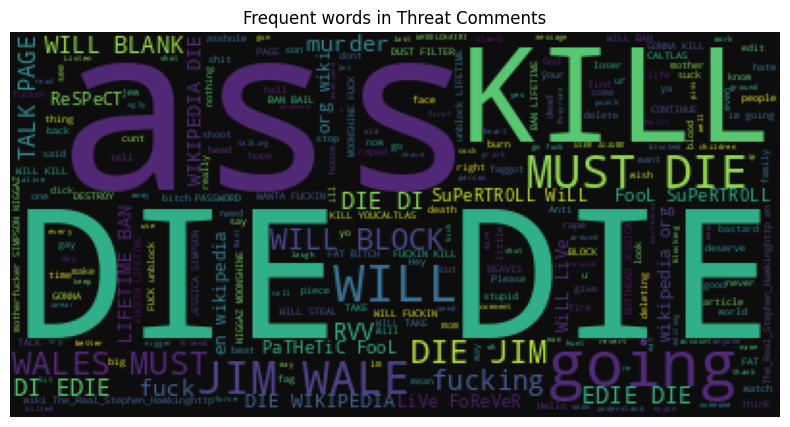

In [ ]:
threat_comments = df_threat['comment_text'].values
wc= WordCloud(max_words=1000,stopwords=stopword)
wc.generate(" ".join(threat_comments))
plt.figure(figsize=(10,5))
plt.axis("off")
plt.title("Frequent words in Threat Comments")
plt.imshow(wc.recolor(), alpha=0.95)
plt.show()

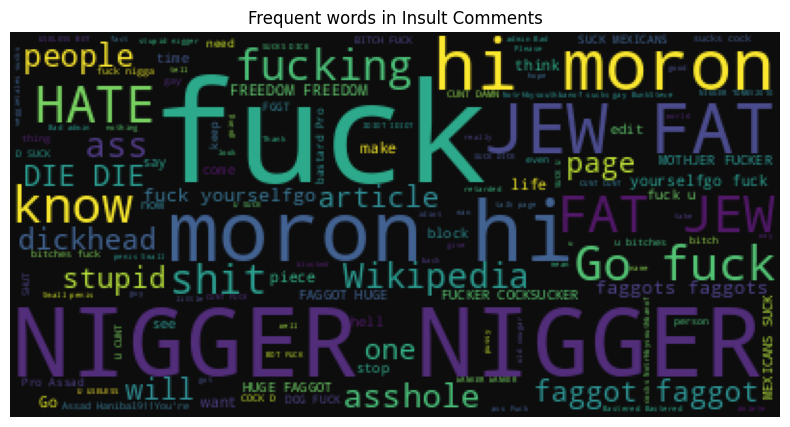

In [ ]:
insult_comments = df_insult['comment_text'].values
wc= WordCloud(max_words=1000,stopwords=stopword)
wc.generate(" ".join(insult_comments))
plt.figure(figsize=(10,5))
plt.axis("off")
plt.title("Frequent words in Insult Comments")
plt.imshow(wc.recolor(), alpha=0.95)
plt.show()

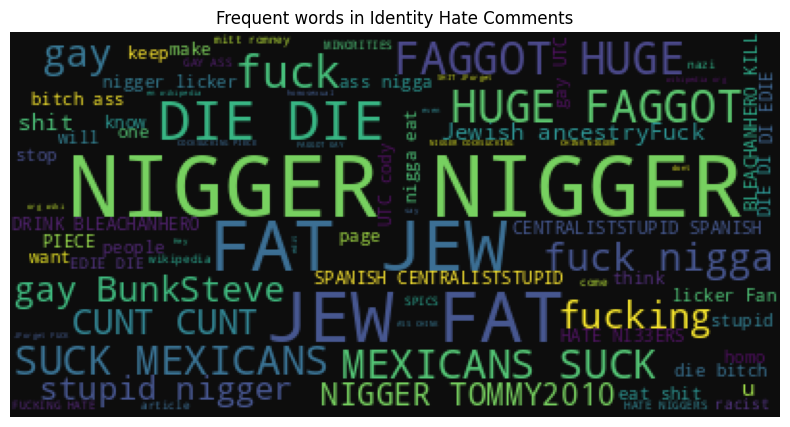

In [ ]:
identity_hate_comments =df_identity_hate['comment_text'].values
wc= WordCloud(max_words=1000,stopwords=stopword)
wc.generate(" ".join(identity_hate_comments))
plt.figure(figsize=(10,5))
plt.axis("off")
plt.title("Frequent words in Identity Hate Comments")
plt.imshow(wc.recolor(), alpha=0.95)
plt.show()

Data Cleaning

In [ ]:
import emoji
import contractions
from textblob import TextBlob

def clean_text(text):

    text = str(text)
    text = text.lower()
    text = emoji.demojize(text)
    text = re.sub(r"https?://\S+|www\.\S+", "", text)
    html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
    text = re.sub(html, "", text)
    text = re.sub(r'[^\x00-\x7f]',r'', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')


    # manually removing

    sample_typos_slang = {
                                "w/e": "whatever",
                                "usagov": "usa government",
                                "recentlu": "recently",
                                "ph0tos": "photos",
                                "amirite": "am i right",
                                "exp0sed": "exposed",
                                "<3": "love",
                                "luv": "love",
                                "amageddon": "armageddon",
                                "trfc": "traffic",
                                "16yr": "16 year"
                                }

        # Acronyms
    sample_acronyms =  {
                        "mh370": "malaysia airlines flight 370",
                        "okwx": "oklahoma city weather",
                        "arwx": "arkansas weather",
                        "gawx": "georgia weather",
                        "scwx": "south carolina weather",
                        "cawx": "california weather",
                        "tnwx": "tennessee weather",
                        "azwx": "arizona weather",
                        "alwx": "alabama weather",
                        "usnwsgov": "united states national weather service",
                        "2mw": "tomorrow"
                        }


    # Some common abbreviations
    sample_abbr = {
                    "$" : " dollar ",
                    "€" : " euro ",
                    "4ao" : "for adults only",
                    "a.m" : "before midday",
                    "a3" : "anytime anywhere anyplace",
                    "aamof" : "as a matter of fact",
                    "acct" : "account",
                    "adih" : "another day in hell",
                    "afaic" : "as far as i am concerned",
                    "afaict" : "as far as i can tell",
                    "afaik" : "as far as i know",
                    "afair" : "as far as i remember",
                    "afk" : "away from keyboard",
                    "app" : "application",
                    "approx" : "approximately",
                    "apps" : "applications",
                    "asap" : "as soon as possible",
                    "asl" : "age, sex, location",
                    "atk" : "at the keyboard",
                    "ave." : "avenue",
                    "aymm" : "are you my mother",
                    "ayor" : "at your own risk",
                    "b&b" : "bed and breakfast",
                    "b+b" : "bed and breakfast",
                    "b.c" : "before christ",
                    "b2b" : "business to business",
                    "b2c" : "business to customer",
                    "b4" : "before",
                    "b4n" : "bye for now",
                    "b@u" : "back at you",
                    "bae" : "before anyone else",
                    "bak" : "back at keyboard",
                    "bbbg" : "bye bye be good",
                    "bbc" : "british broadcasting corporation",
                    "bbias" : "be back in a second",
                    "bbl" : "be back later",
                    "bbs" : "be back soon",
                    "be4" : "before",
                    "bfn" : "bye for now",
                    "blvd" : "boulevard",
                    "bout" : "about",
                    "brb" : "be right back",
                    "bros" : "brothers",
                    "brt" : "be right there",
                    "bsaaw" : "big smile and a wink",
                    "btw" : "by the way",
                    "bwl" : "bursting with laughter",
                    "c/o" : "care of",
                    "cet" : "central european time",
                    "cf" : "compare",
                    "cia" : "central intelligence agency",
                    "csl" : "can not stop laughing",
                    "cu" : "see you",
                    "cul8r" : "see you later",
                    "cv" : "curriculum vitae",
                    "cwot" : "complete waste of time",
                    "cya" : "see you",
                    "cyt" : "see you tomorrow",
                    "dae" : "does anyone else",
                    "dbmib" : "do not bother me i am busy",
                    "diy" : "do it yourself",
                    "dm" : "direct message",
                    "dwh" : "during work hours",
                    "e123" : "easy as one two three",
                    "eet" : "eastern european time",
                    "eg" : "example",
                    "embm" : "early morning business meeting",
                    "encl" : "enclosed",
                    "encl." : "enclosed",
                    "etc" : "and so on",
                    "faq" : "frequently asked questions",
                    "fawc" : "for anyone who cares",
                    "fb" : "facebook",
                    "fc" : "fingers crossed",
                    "fig" : "figure",
                    "fimh" : "forever in my heart",
                    "ft." : "feet",
                    "ft" : "featuring",
                    "ftl" : "for the loss",
                    "ftw" : "for the win",
                    "fwiw" : "for what it is worth",
                    "fyi" : "for your information",
                    "g9" : "genius",
                    "gahoy" : "get a hold of yourself",
                    "gal" : "get a life",
                    "gcse" : "general certificate of secondary education",
                    "gfn" : "gone for now",
                    "gg" : "good game",
                    "gl" : "good luck",
                    "glhf" : "good luck have fun",
                    "gmt" : "greenwich mean time",
                    "gmta" : "great minds think alike",
                    "gn" : "good night",
                    "g.o.a.t" : "greatest of all time",
                    "goat" : "greatest of all time",
                    "goi" : "get over it",
                    "gps" : "global positioning system",
                    "gr8" : "great",
                    "gratz" : "congratulations",
                    "gyal" : "girl",
                    "h&c" : "hot and cold",
                    "hp" : "horsepower",
                    "hr" : "hour",
                    "hrh" : "his royal highness",
                    "ht" : "height",
                    "ibrb" : "i will be right back",
                    "ic" : "i see",
                    "icq" : "i seek you",
                    "icymi" : "in case you missed it",
                    "idc" : "i do not care",
                    "idgadf" : "i do not give a damn fuck",
                    "idgaf" : "i do not give a fuck",
                    "idk" : "i do not know",
                    "ie" : "that is",
                    "i.e" : "that is",
                    "ifyp" : "i feel your pain",
                    "IG" : "instagram",
                    "iirc" : "if i remember correctly",
                    "ilu" : "i love you",
                    "ily" : "i love you",
                    "imho" : "in my humble opinion",
                    "imo" : "in my opinion",
                    "imu" : "i miss you",
                    "iow" : "in other words",
                    "irl" : "in real life",
                    "j4f" : "just for fun",
                    "jic" : "just in case",
                    "jk" : "just kidding",
                    "jsyk" : "just so you know",
                    "l8r" : "later",
                    "lb" : "pound",
                    "lbs" : "pounds",
                    "ldr" : "long distance relationship",
                    "lmao" : "laugh my ass off",
                    "lmfao" : "laugh my fucking ass off",
                    "lol" : "laughing out loud",
                    "ltd" : "limited",
                    "ltns" : "long time no see",
                    "m8" : "mate",
                    "mf" : "motherfucker",
                    "mfs" : "motherfuckers",
                    "mfw" : "my face when",
                    "mofo" : "motherfucker",
                    "mph" : "miles per hour",
                    "mr" : "mister",
                    "mrw" : "my reaction when",
                    "ms" : "miss",
                    "mte" : "my thoughts exactly",
                    "nagi" : "not a good idea",
                    "nbc" : "national broadcasting company",
                    "nbd" : "not big deal",
                    "nfs" : "not for sale",
                    "ngl" : "not going to lie",
                    "nhs" : "national health service",
                    "nrn" : "no reply necessary",
                    "nsfl" : "not safe for life",
                    "nsfw" : "not safe for work",
                    "nth" : "nice to have",
                    "nvr" : "never",
                    "nyc" : "new york city",
                    "oc" : "original content",
                    "og" : "original",
                    "ohp" : "overhead projector",
                    "oic" : "oh i see",
                    "omdb" : "over my dead body",
                    "omg" : "oh my god",
                    "omw" : "on my way",
                    "p.a" : "per annum",
                    "p.m" : "after midday",
                    "pm" : "prime minister",
                    "poc" : "people of color",
                    "pov" : "point of view",
                    "pp" : "pages",
                    "ppl" : "people",
                    "prw" : "parents are watching",
                    "ps" : "postscript",
                    "pt" : "point",
                    "ptb" : "please text back",
                    "pto" : "please turn over",
                    "qpsa" : "what happens", #"que pasa",
                    "ratchet" : "rude",
                    "rbtl" : "read between the lines",
                    "rlrt" : "real life retweet",
                    "rofl" : "rolling on the floor laughing",
                    "roflol" : "rolling on the floor laughing out loud",
                    "rotflmao" : "rolling on the floor laughing my ass off",
                    "rt" : "retweet",
                    "ruok" : "are you ok",
                    "sfw" : "safe for work",
                    "sk8" : "skate",
                    "smh" : "shake my head",
                    "sq" : "square",
                    "srsly" : "seriously",
                    "ssdd" : "same stuff different day",
                    "tbh" : "to be honest",
                    "tbs" : "tablespooful",
                    "tbsp" : "tablespooful",
                    "tfw" : "that feeling when",
                    "thks" : "thank you",
                    "tho" : "though",
                    "thx" : "thank you",
                    "tia" : "thanks in advance",
                    "til" : "today i learned",
                    "tl;dr" : "too long i did not read",
                    "tldr" : "too long i did not read",
                    "tmb" : "tweet me back",
                    "tntl" : "trying not to laugh",
                    "ttyl" : "talk to you later",
                    "u" : "you",
                    "u2" : "you too",
                    "u4e" : "yours for ever",
                    "utc" : "coordinated universal time",
                    "w/" : "with",
                    "w/o" : "without",
                    "w8" : "wait",
                    "wassup" : "what is up",
                    "wb" : "welcome back",
                    "wtf" : "what the fuck",
                    "wtg" : "way to go",
                    "wtpa" : "where the party at",
                    "wuf" : "where are you from",
                    "wuzup" : "what is up",
                    "wywh" : "wish you were here",
                    "yd" : "yard",
                    "ygtr" : "you got that right",
                    "ynk" : "you never know",
                    "zzz" : "sleeping bored and tired"
                    }

    sample_typos_slang_pattern = re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in sample_typos_slang.keys()) + r')(?!\w)')
    sample_acronyms_pattern = re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in sample_acronyms.keys()) + r')(?!\w)')
    sample_abbr_pattern = re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in sample_abbr.keys()) + r')(?!\w)')

    text = sample_typos_slang_pattern.sub(lambda x: sample_typos_slang[x.group()], text)
    text = sample_acronyms_pattern.sub(lambda x: sample_acronyms[x.group()], text)
    text = sample_abbr_pattern.sub(lambda x: sample_abbr[x.group()], text)

    #text = TextBlob(text).correct()

    return text

df["comment_text"] = df["comment_text"].apply(lambda x: contractions.fix(x))
df['comment_text'] = df['comment_text'].map(lambda comment : clean_text(comment))



In [ ]:
df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,non_toxic
0,explanation why the edits made under my userna...,0,0,0,0,0,0,True
1,daww he matches this background colour i am se...,0,0,0,0,0,0,True
2,hey man i am really not trying to edit war it ...,0,0,0,0,0,0,True
3,more i cannot make any real suggestions on imp...,0,0,0,0,0,0,True
4,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,True


In [ ]:
import nltk
nltk.download('punkt')

df['tokens'] = df['comment_text'].apply(lambda x: nltk.word_tokenize(x))
df['tokens']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0         [explanation, why, the, edits, made, under, my...
1         [daww, he, matches, this, background, colour, ...
2         [hey, man, i, am, really, not, trying, to, edi...
3         [more, i, can, not, make, any, real, suggestio...
4         [you, sir, are, my, hero, any, chance, you, re...
                                ...                        
159566    [and, for, the, second, time, of, asking, when...
159567    [you, should, be, ashamed, of, yourself, that,...
159568    [spitzer, umm, there, is, no, actual, article,...
159569    [and, it, looks, like, it, was, actually, you,...
159570    [and, i, really, do, not, think, you, understa...
Name: tokens, Length: 159571, dtype: object

In [ ]:
df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,non_toxic,tokens
0,explanation why the edits made under my userna...,0,0,0,0,0,0,True,"[explanation, why, the, edits, made, under, my..."
1,daww he matches this background colour i am se...,0,0,0,0,0,0,True,"[daww, he, matches, this, background, colour, ..."
2,hey man i am really not trying to edit war it ...,0,0,0,0,0,0,True,"[hey, man, i, am, really, not, trying, to, edi..."
3,more i cannot make any real suggestions on imp...,0,0,0,0,0,0,True,"[more, i, can, not, make, any, real, suggestio..."
4,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,True,"[you, sir, are, my, hero, any, chance, you, re..."


In [ ]:
# Removing stopwords.
nltk.download("stopwords")
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))
df['stop_removed'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,non_toxic,tokens,stop_removed
0,explanation why the edits made under my userna...,0,0,0,0,0,0,True,"[explanation, why, the, edits, made, under, my...","[explanation, edits, made, username, hardcore,..."
1,daww he matches this background colour i am se...,0,0,0,0,0,0,True,"[daww, he, matches, this, background, colour, ...","[daww, matches, background, colour, seemingly,..."
2,hey man i am really not trying to edit war it ...,0,0,0,0,0,0,True,"[hey, man, i, am, really, not, trying, to, edi...","[hey, man, really, trying, edit, war, guy, con..."
3,more i cannot make any real suggestions on imp...,0,0,0,0,0,0,True,"[more, i, can, not, make, any, real, suggestio...","[make, real, suggestions, improvement, wondere..."
4,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,True,"[you, sir, are, my, hero, any, chance, you, re...","[sir, hero, chance, remember, page]"


In [ ]:
df['final_string'] = df['stop_removed'].apply(lambda x: ' '.join(x))

def temp_func(text):
    text = re.sub('\s+', ' ', text).strip()
    return text

df['final_string'] = df['final_string'].map(lambda comment : temp_func(comment))
df
df_full=df

In [ ]:
string_arr = df['final_string'].tolist()
string_arr[0:6]

['explanation edits made username hardcore metallica fan reverted vandalisms closure gas voted new york dolls fac please remove template talk page since retired',
 'daww matches background colour seemingly stuck thanks talk january coordinated universal time',
 'hey man really trying edit war guy constantly removing relevant information talking edits instead talk page seems care formatting actual info',
 'make real suggestions improvement wondered section statistics later subsection types accidents think references may need tidying exact format date format later noone else first preferences formatting style references want please let know appears backlog articles review guess may delay reviewer turns listed relevant form example wikipediagoodarticlenominationstransport',
 'sir hero chance remember page',
 'congratulations well use tools well talk']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=100,  max_features=10000,
            strip_accents='unicode', analyzer='word',ngram_range=(1,4),
            use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')
tfidf_vector = tfidf.fit_transform(df['final_string'])
print(tfidf_vector.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


(159571, 7150)


In [ ]:
df_req = df
df_req1 = df_req.drop(['comment_text', 'tokens', 'stop_removed', 'final_string'], axis = 1)
df_req1

,toxic,severe_toxic,obscene,threat,insult,identity_hate,non_toxic
0,0,0,0,0,0,0,True
1,0,0,0,0,0,0,True
2,0,0,0,0,0,0,True
3,0,0,0,0,0,0,True
4,0,0,0,0,0,0,True
...,...,...,...,...,...,...,...
159566,0,0,0,0,0,0,True
159567,0,0,0,0,0,0,True
159568,0,0,0,0,0,0,True
159569,0,0,0,0,0,0,True


In [ ]:
df_vector = pd.DataFrame(tfidf_vector)
df_vector

,0
0,"(0, 6134)\t0.15955459340818925\n (0, 4095)\..."
1,"(0, 3350)\t0.28993770169173344\n (0, 1413)\..."
2,"(0, 2069)\t0.26623513288228273\n (0, 3196)\..."
3,"(0, 3547)\t0.15433286274945857\n (0, 2259)\..."
4,"(0, 5179)\t0.4009565311729465\n (0, 970)\t0..."
...,...
159566,"(0, 5482)\t0.29358342740612847\n (0, 1363)\..."
159567,"(0, 491)\t0.6080612051385306\n (0, 3002)\t0..."
159568,"(0, 904)\t0.6300447779153054\n (0, 5355)\t0..."
159569,"(0, 3721)\t0.44422389294233267\n (0, 3719)\..."


In [ ]:
result_df = pd.concat([df_vector, df_req1], axis=1, join='inner')
result_df

,0,toxic,severe_toxic,obscene,threat,insult,identity_hate,non_toxic
0,"(0, 6134)\t0.15955459340818925\n (0, 4095)\...",0,0,0,0,0,0,True
1,"(0, 3350)\t0.28993770169173344\n (0, 1413)\...",0,0,0,0,0,0,True
2,"(0, 2069)\t0.26623513288228273\n (0, 3196)\...",0,0,0,0,0,0,True
3,"(0, 3547)\t0.15433286274945857\n (0, 2259)\...",0,0,0,0,0,0,True
4,"(0, 5179)\t0.4009565311729465\n (0, 970)\t0...",0,0,0,0,0,0,True
...,...,...,...,...,...,...,...,...
159566,"(0, 5482)\t0.29358342740612847\n (0, 1363)\...",0,0,0,0,0,0,True
159567,"(0, 491)\t0.6080612051385306\n (0, 3002)\t0...",0,0,0,0,0,0,True
159568,"(0, 904)\t0.6300447779153054\n (0, 5355)\t0...",0,0,0,0,0,0,True
159569,"(0, 3721)\t0.44422389294233267\n (0, 3719)\...",0,0,0,0,0,0,True


#Undersampling method 2

In [ ]:
# df=result_df

In [ ]:
# import pandas as pd
# import numpy as np


# # Split your data into training and testing sets
# train_df = df.sample(frac=0.8, random_state=42)
# test_df = df.drop(train_df.index)

# # Set the target size of the balanced dataset and the desired reduction
# target_size = 10000
# reduction = len(df) - target_size

# # Loop over each output column
# output_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
# for col in output_cols:
#     # Identify the minority class
#     minority_class = train_df[col].value_counts().idxmin()

#     # Count the number of minority class samples
#     minority_count = (train_df[col] == minority_class).sum()

#     # Count the number of majority class samples
#     majority_count = (train_df[col] != minority_class).sum()

#     # Calculate the number of samples to be added
#     num_augmented_samples = min(majority_count - minority_count, reduction // len(output_cols))

#     # Generate augmented data
#     augmented_data = []
#     while len(augmented_data) < num_augmented_samples:
#         # Select a random majority class sample
#         majority_sample = train_df[train_df[col] != minority_class].sample(1).iloc[0]

#         # Flip the output value for the minority class
#         new_output = majority_sample[col]
#         new_output = 1 - new_output

#         # Create a new row with the same text and the flipped output value
#         new_row = majority_sample.copy()
#         new_row[col] = new_output
#         augmented_data.append(new_row)

#     # Append the augmented data to the training set
#     train_df = pd.concat([train_df, pd.DataFrame(augmented_data)], ignore_index=True)

#     # Reduce the size of the augmented data if it exceeds the reduction limit
#     if len(train_df) > target_size:
#         train_df = train_df.sample(n=target_size, random_state=42)

# # Save the balanced data to a new file
# balanced_df = train_df.append(test_df)
# balanced_df.to_csv('balanced_data.csv', index=False)
# balanced_df


In [ ]:
# df=balanced_df

In [ ]:
# import pandas as pd

# # # get the list of values in column 'B'
# # b_list = df[0].tolist()

# b_list = np.array(df[0])
# # print the list of values
# print(b_list)


In [ ]:
# df_req_full_sam = balanced_df.drop([0,'non_toxic'], axis = 1)
# df_req_full_sam

#original data

In [ ]:
######################################################################################################################################################################################################

In [ ]:
df_req_full1 = df_full.drop(['comment_text', 'tokens', 'stop_removed', 'final_string','non_toxic'], axis = 1)
df_req_full1

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=100,  max_features=10000,
            strip_accents='unicode', analyzer='word',ngram_range=(1,4),
            use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')
tfidf_vector = tfidf.fit_transform(df_full['final_string'])
print(tfidf_vector.shape)
df_req_vector_full = tfidf_vector
df_req_vector_full

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


(159571, 7150)


<159571x7150 sparse matrix of type '<class 'numpy.float64'>'
	with 3573913 stored elements in Compressed Sparse Row format>

In [ ]:
######################################################################################################################################################################################################

#joining of 2 codes

In [ ]:
# df_req_full1=df_req_full_sam

In [ ]:
# df_req_vector_full=b_list

#Train test split

In [ ]:
x_train_big, x_test_big, y_train_big, y_test_big = train_test_split(df_req_vector_full, df_req_full1, test_size = 0.2)

In [ ]:
# print(len(x_train_big))
# print(len(y_train_big))
# print(len(x_test_big))
# print(len(y_test_big))

#validating dataframe length

In [ ]:
print(y_train_big.iloc[:,0])

139362    0
105353    0
18091     0
66416     0
8428      0
         ..
136970    0
115633    0
140823    1
77849     0
56091     0
Name: toxic, Length: 127656, dtype: int64


In [ ]:
print(x_train_big.shape)
print(len(y_train_big))

(127656, 7150)
127656


#Training models

#Random Forest

In [ ]:
# # Random Forest

# pred_model1 = []
# def model1(x_train_fnc, y_train_fnc, x_test_fnc,y_test_fnc, num):
#   y_train_fnc = y_train_fnc.astype('int')
#   y_test_fnc = y_test_fnc.astype('int')


#   # clf = RandomForestClassifier(n_estimators = 300, random_state = 5, max_depth = 100)

#   class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_fnc), y=y_train_fnc)
#    # define the weighted random forest classifier
#   clf = RandomForestClassifier(n_estimators = 300, random_state = 5, max_depth = 100,class_weight={0: class_weights[0], 1: class_weights[1]})


#   clf.fit(x_train_fnc, y_train_fnc)
#   y_pred_fnc = clf.predict(x_test_fnc)
#   pred_model1.append(y_pred_fnc)
#   add = '/content/gdrive/MyDrive/Colab Notebooks/major_project/rf' + str(num) + '.sav'
#   pickle.dump(clf, open(add, 'wb'))
#   accu = accuracy_score(y_test_fnc, y_pred_fnc)
#   print(accu*100)
#   # Model evaluation
#   print(classification_report(y_test_fnc, y_pred_fnc))


# out_col_arr = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
# for i in range(0, len(out_col_arr)):
#   name = out_col_arr[i]
#   model1(x_train_big, y_train_big[name], x_test_big, y_test_big[name], i + 1)

# print(pred_model1)

#Logistic Regression

In [ ]:
# # Logistic Regression

# pred_model2 = []
# def model2(x_train_fnc, y_train_fnc, x_test_fnc,y_test_fnc,num):
#   y_train_fnc = y_train_fnc.astype('int')
#   y_test_fnc = y_test_fnc.astype('int')

#   class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_fnc), y=y_train_fnc)
#    # define the weighted random forest classifier


#   clf = LogisticRegression(C = 1.0, max_iter = 100, penalty = 'l2',class_weight={0: class_weights[0], 1: class_weights[1]})
#   clf.fit(x_train_fnc, y_train_fnc)
#   y_pred_fnc = clf.predict(x_test_fnc)
#   pred_model2.append(y_pred_fnc)
#   add = '/content/gdrive/MyDrive/Colab Notebooks/major_project/lr' + str(num) + '.sav'
#   pickle.dump(clf, open(add, 'wb'))
#   accu = accuracy_score(y_test_fnc, y_pred_fnc)
#   print(accu*100)
#   # Model evaluation
#   print(classification_report(y_test_fnc, y_pred_fnc))

# out_col_arr = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
# for i in range(0, len(out_col_arr)):
#   name = out_col_arr[i]
#   model2(x_train_big, y_train_big[name], x_test_big, y_test_big[name], i + 1)

# print(pred_model2)

#SVM

In [ ]:
# # SVM

# pred_model3 = []
# def model3(x_train_fnc, y_train_fnc, x_test_fnc,y_test_fnc,num):
#   y_train_fnc = y_train_fnc.astype('int')
#   y_test_fnc = y_test_fnc.astype('int')

#   class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_fnc), y=y_train_fnc)

#   clf = SVC(kernel = 'linear', C = 2.0, random_state = 500,class_weight={0: class_weights[0], 1: class_weights[1]})
#   clf.fit(x_train_fnc, y_train_fnc)
#   y_pred_fnc = clf.predict(x_test_fnc)
#   pred_model3.append(y_pred_fnc)
#   add = '/content/gdrive/MyDrive/Colab Notebooks/major_project/svm' + str(num) + '.sav'
#   pickle.dump(clf, open(add, 'wb'))
#   accu = accuracy_score(y_test_fnc, y_pred_fnc)
#   print(accu*100)
#   # Model evaluation
#   print(classification_report(y_test_fnc, y_pred_fnc))

# out_col_arr = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
# for i in range(0, len(out_col_arr)):
#   name = out_col_arr[i]
#   model3(x_train_big, y_train_big[name], x_test_big, y_test_big[name], i + 1)

# print(pred_model3)

#KNN

In [ ]:
# # KNN

# pred_model4 = []
# def model4(x_train_fnc, y_train_fnc, x_test_fnc,y_test_fnc,num):
#   y_train_fnc = y_train_fnc.astype('int')
#   y_test_fnc = y_test_fnc.astype('int')
#   clf = KNeighborsClassifier(algorithm = 'auto', leaf_size = 30, n_neighbors = 3)
#   clf.fit(x_train_fnc, y_train_fnc)
#   y_pred_fnc = clf.predict(x_test_fnc)
#   pred_model4.append(y_pred_fnc)
#   add = '/content/gdrive/MyDrive/Colab Notebooks/major_project/knn' + str(num) + '.sav'
#   pickle.dump(clf, open(add, 'wb'))
#   accu = accuracy_score(y_test_fnc, y_pred_fnc)
#   print(accu*100)
#   # Model evaluation
#   print(classification_report(y_test_fnc, y_pred_fnc))

# out_col_arr = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
# for i in range(0, len(out_col_arr)):
#   name = out_col_arr[i]
#   model4(x_train_big, y_train_big[name], x_test_big, y_test_big[name], i + 1)

# print(pred_model4)

#GBM

In [ ]:
# # GBM

# pred_model5 = []
# def model5(x_train_fnc, y_train_fnc, x_test_fnc,y_test_fnc,num):
#   y_train_fnc = y_train_fnc.astype('int')
#   y_test_fnc = y_test_fnc.astype('int')
#   clf = GradientBoostingClassifier(n_estimators = 100, max_depth = 100)
#   clf.fit(x_train_fnc, y_train_fnc)
#   y_pred_fnc = clf.predict(x_test_fnc)
#   pred_model5.append(y_pred_fnc)
#   add = '/content/gdrive/MyDrive/Colab Notebooks/major_project/gbm' + str(num) + '.sav'
#   pickle.dump(clf, open(add, 'wb'))
#   accu = accuracy_score(y_test_fnc, y_pred_fnc)
#   print(accu*100)
#   # Model evaluation
#   print(classification_report(y_test_fnc, y_pred_fnc))

# out_col_arr = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
# for i in range(0, len(out_col_arr)):
#   name = out_col_arr[i]
#   model5(x_train_big, y_train_big[name], x_test_big, y_test_big[name], i + 1)

# print(pred_model5)

#Decision Tree Classifier

In [ ]:
# clf_arr = []


# def temp(string):
#   x_train_fnc, x_test_fnc, y_train_fnc, y_test_fnc = train_test_split(tfidf_vector, df[string], test_size = 0.2)
#   y_train_fnc = y_train_fnc.astype('int')
#   y_test_fnc = y_test_fnc.astype('int')
#   class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_fnc), y=y_train_fnc)

#   clf = DecisionTreeClassifier(max_depth = 100,class_weight={0: class_weights[0], 1: class_weights[1]})
#   clf.fit(x_train_fnc, y_train_fnc)
#   clf_arr.append(clf)
#   y_pred_fnc = clf.predict(x_test_fnc)
#   accu = accuracy_score(y_test_fnc, y_pred_fnc)
#   print(accu*100)
#   # Model evaluation
#   print(classification_report(y_test_fnc, y_pred_fnc))

# type_arr = ['toxic','severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
# for i in type_arr:
#   temp(i)

# print(clf_arr)

# XGB classifier

In [ ]:
# # XGB classifier
# from xgboost.sklearn import XGBClassifier

# pred_model7 = []
# def model7(x_train_fnc, y_train_fnc, x_test_fnc,y_test_fnc,num):
#   y_train_fnc = y_train_fnc.astype('int')
#   y_test_fnc = y_test_fnc.astype('int')
#   class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_fnc), y=y_train_fnc)

#   clf = XGBClassifier(max_iter=500,class_weight={0: class_weights[0], 1: class_weights[1]})
#   clf.fit(x_train_fnc, y_train_fnc)
#   y_pred_fnc = clf.predict(x_test_fnc)
#   pred_model7.append(y_pred_fnc)
#   add = '/content/gdrive/MyDrive/Colab Notebooks/major_project/xgb' + str(num) + '.sav'
#   pickle.dump(clf, open(add, 'wb'))
#   accu = accuracy_score(y_test_fnc, y_pred_fnc)
#   print(accu*100)
#   print(classification_report(y_test_fnc, y_pred_fnc))

# out_col_arr = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
# for i in range(0, len(out_col_arr)):
#   name = out_col_arr[i]
#   model7(x_train_big, y_train_big[name], x_test_big, y_test_big[name], i + 1)

# print(pred_model7)


#LGBM

In [ ]:
# # LGBM

# from lightgbm import LGBMClassifier

# pred_model8 = []
# def model8(x_train_fnc, y_train_fnc, x_test_fnc,y_test_fnc,num):
#   y_train_fnc = y_train_fnc.astype('int')
#   y_test_fnc = y_test_fnc.astype('int')
#   class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_fnc), y=y_train_fnc)
#   clf = LGBMClassifier(class_weight={0: class_weights[0], 1: class_weights[1]})
#   clf.fit(x_train_fnc, y_train_fnc)
#   y_pred_fnc = clf.predict(x_test_fnc)
#   pred_model8.append(y_pred_fnc)
#   add = '/content/gdrive/MyDrive/Colab Notebooks/major_project/lgbm' + str(num) + '.sav'
#   pickle.dump(clf, open(add, 'wb'))
#   accu = accuracy_score(y_test_fnc, y_pred_fnc)
#   print(accu*100)
#   print(classification_report(y_test_fnc, y_pred_fnc))

# out_col_arr = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
# for i in range(0, len(out_col_arr)):
#   name = out_col_arr[i]
#   model8(x_train_big, y_train_big[name], x_test_big, y_test_big[name], i + 1)

# print(pred_model8)

#QDA model

In [ ]:
# # QDA model

# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

# pred_model6 = []
# def model6(x_train_fnc, y_train_fnc, x_test_fnc,y_test_fnc,num):
#   y_train_fnc = y_train_fnc.astype('int')
#   y_test_fnc = y_test_fnc.astype('int')
#   clf = QDA()
#   x_train_fnc = x_train_fnc.toarray()
#   x_test_fnc = x_test_fnc.toarray()
#   clf.fit(x_train_fnc, y_train_fnc)
#   y_pred_fnc = clf.predict(x_test_fnc)
#   pred_model6.append(y_pred_fnc)
#   add = '/content/gdrive/MyDrive/Colab Notebooks/major_project/qda' + str(num) + '.sav'
#   pickle.dump(clf, open(add, 'wb'))
#   accu = accuracy_score(y_test_fnc, y_pred_fnc)
#   print(accu*100)
#   print(classification_report(y_test_fnc, y_pred_fnc))

# out_col_arr = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
# for i in range(0, len(out_col_arr)):
#   name = out_col_arr[i]
#   model6(x_train_big, y_train_big[name], x_test_big, y_test_big[name], i + 1)

# print(pred_model6)

#Final Codes

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
df_test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/major_project/test.csv',header=None)
df_test

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,0,1
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [ ]:
df_test.rename(columns = {0:'id', 1:'column_text'}, inplace = True)
df_test.head()

,id,column_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [ ]:
test_string_arr = df_test['column_text'].tolist()
test_string_arr[0:7]

["Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,",
 '== From RfC == \n\n The title is fine as it is, IMO.',
 '" \n\n == Sources == \n\n * Zawe Ashton on Lapland —  /  "',
 ":If you have a look back at the source, the information I updated was the correct form. I can only guess the source hadn't updated. I shall update the information once again but thank you for your message.",
 "I don't anonymously edit articles at all.",
 'Thank you for understanding. I think very highly of you and would not revert without discussion.',
 'Please do not add nonsense to Wikipedia. Such edits are considered vandalism and quickly undone. If you would like to experiment, please use the sand

In [ ]:
# taking the best model for each output column

model_str = [['rf', 'lr', 'svm', 'knn' ,'xgb', 'lgbm'], ['rf', 'lr', 'svm', 'lgbm'], ['rf', 'lr', 'svm','xgb', 'lgbm'], ['lr', 'svm','xgb', 'lgbm'], ['rf', 'lr', 'svm' ,'xgb', 'lgbm'], ['rf', 'svm','xgb']]
models = []
for i in range(0, 6):
  temp_model = []
  for model_name in model_str[i]:
    add = '/content/gdrive/MyDrive/Colab Notebooks/major_project/' + model_name + str(i + 1) + '.sav'
    curr_model_out = pickle.load(open(add, 'rb'))
    temp_model.append(curr_model_out)
  models.append(temp_model)

In [ ]:
def pred_prob(inp_str, model_arr_name):
  clean_str = clean_text(inp_str)
  test_vec = tfidf.transform([clean_str])
  tot_model = len(model_arr_name)
  cnt_1 = 0
  for curr_model in model_arr_name:
    y_pred = curr_model.predict(test_vec)
    y_pred = y_pred[0]
    if(y_pred == 1):
      cnt_1 += 1
  return round(cnt_1/tot_model, 3)

test_str = ":Fuck off, you anti-semitic cunt.  |"

out_prob_arr = []

for col in range(1, 7):
  out_prob_arr.append(pred_prob(test_str, models[col-1]))

print("The probabilities of each label:")
print(out_prob_arr)

out_label_arr = []

for i in range(0, 6):
  if(out_prob_arr[i] >= 0.5):
    out_label_arr.append(1)
  else:
    out_label_arr.append(0)

print("The class of each label:")
print(out_label_arr)

The probabilities of each label:
[1.0, 1.0, 1.0, 0.0, 1.0, 0.667]
The class of each label:
[1, 1, 1, 0, 1, 1]


In [ ]:
test_string_arr = test_string_arr[0:1000]
# test_string_arr = test_string_arr
len(test_string_arr)

1000

In [ ]:
# The probabilities for the first 50 comments of the test.csv file

pred_prob_big = []

for test_string in test_string_arr:
  out_prob_arr = []
  for col in range(1, 7):
    out_prob_arr.append(pred_prob(test_string, models[col - 1]))
  pred_prob_big.append(out_prob_arr)
  #print(out_prob_arr)

print(pred_prob_big)

[[0.833, 0.75, 1.0, 0.25, 1.0, 0.333], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.167, 0.0, 0.0, 0.0, 0.2, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.667, 0.0, 0.0, 0.0, 0.2, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.5, 0.0, 0.4, 0.0, 0.4, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.667, 0.25, 0.4, 0.25, 0.4, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.25, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.667, 0.5, 0.0, 0.0, 0.0, 0.333], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0,

In [ ]:
pred_label_big = []

for i in range(0, len(pred_prob_big)):
  temp = []
  for prob in pred_prob_big[i]:
    if(prob >= 0.5):
      temp.append(1)
    else:
      temp.append(0)
  pred_label_big.append(temp)

print(pred_label_big)

[[1, 1, 1, 0, 1, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [1, 1, 1, 0, 1, 1], [0, 0, 0, 0, 0, 0],

In [ ]:
df_debug = df_test.iloc[0:1000, :]
df_debug

,id,column_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
995,01a988a23a5d9925,== Salem witch Trials task force == \n\n Dear ...
996,01a9ebf72533595b,== Lyor Cohen == \n\n If you try and take out ...
997,01aa8fb1bff7e5cd,Will you all please just listen to yourselves ...
998,01aafd548fe45134,"While at Time, Corliss has profiled many film ..."


In [ ]:
pred_prob_big_np = np.array(pred_prob_big)
print(pred_prob_big_np)

[[0.833 0.75  1.    0.25  1.    0.333]
 [0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.   ]
 ...
 [0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.   ]
 [0.667 0.25  0.4   0.    0.8   0.   ]]


In [ ]:
pred_label_big_np = np.array(pred_label_big)
print(pred_label_big_np)

[[1 1 1 0 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 0 0 1 0]]


In [ ]:
df_new_label = pd.DataFrame(pred_prob_big_np, columns = ['toxic','severe_toxic','obscene','threat', 'insult', 'identity_hate'])
df_new_label

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0.833,0.75,1.0,0.25,1.0,0.333
1,0.000,0.00,0.0,0.00,0.0,0.000
2,0.000,0.00,0.0,0.00,0.0,0.000
3,0.000,0.00,0.0,0.00,0.0,0.000
4,0.167,0.00,0.0,0.00,0.2,0.000
...,...,...,...,...,...,...
995,0.000,0.00,0.0,0.00,0.0,0.000
996,0.833,0.25,1.0,0.00,0.8,0.000
997,0.000,0.00,0.0,0.00,0.0,0.000
998,0.000,0.00,0.0,0.00,0.0,0.000


In [ ]:
df_new_label_bin = pd.DataFrame(pred_label_big_np, columns = ['toxic_label','severe_toxic_label','obscene_label','threat_label', 'insult_label', 'identity_hate_label'])
df_new_label_bin

,toxic_label,severe_toxic_label,obscene_label,threat_label,insult_label,identity_hate_label
0,1,1,1,0,1,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
995,0,0,0,0,0,0
996,1,0,1,0,1,0
997,0,0,0,0,0,0
998,0,0,0,0,0,0


In [ ]:
result = pd.concat([df_debug, df_new_label, df_new_label_bin], axis=1, join='inner')
result

,id,column_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxic_label,severe_toxic_label,obscene_label,threat_label,insult_label,identity_hate_label
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,0.833,0.75,1.0,0.25,1.0,0.333,1,1,1,0,1,0
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,0.000,0.00,0.0,0.00,0.0,0.000,0,0,0,0,0,0
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",0.000,0.00,0.0,0.00,0.0,0.000,0,0,0,0,0,0
3,00017563c3f7919a,":If you have a look back at the source, the in...",0.000,0.00,0.0,0.00,0.0,0.000,0,0,0,0,0,0
4,00017695ad8997eb,I don't anonymously edit articles at all.,0.167,0.00,0.0,0.00,0.2,0.000,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,01a988a23a5d9925,== Salem witch Trials task force == \n\n Dear ...,0.000,0.00,0.0,0.00,0.0,0.000,0,0,0,0,0,0
996,01a9ebf72533595b,== Lyor Cohen == \n\n If you try and take out ...,0.833,0.25,1.0,0.00,0.8,0.000,1,0,1,0,1,0
997,01aa8fb1bff7e5cd,Will you all please just listen to yourselves ...,0.000,0.00,0.0,0.00,0.0,0.000,0,0,0,0,0,0
998,01aafd548fe45134,"While at Time, Corliss has profiled many film ...",0.000,0.00,0.0,0.00,0.0,0.000,0,0,0,0,0,0


In [ ]:
import os
folder_path = '/content/gdrive/MyDrive/Colab Notebooks/major_project/'
import pandas as pd
file_name = 'result.csv'  #balanced_df save hoga drive mai df namse
file_path = os.path.join(folder_path, file_name)
result.to_csv(file_path, index=False)

#Conclusion

Then we called the predict_prob function for the initial 1000 of the test.csv file to find the corresponding labels and probabilities of the test.csv comments because the test.csv file has around 1.5 lakh comments and it is taking very much time to predict all the 1.5 lakh comments,  and then we made the final dataframe to show the output which includes our id column, comment_text column and the output label probabilities and classes. And then at the end we save our dataframe to the google drive to download my result.csv file to upload that.
